In [252]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [253]:
df=pd.read_csv('mall_customers.csv')
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [254]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [255]:
df.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [256]:
df.shape

(200, 5)

In [257]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [258]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [259]:
df.drop(['CustomerID','Gender'],axis=1,inplace=True)

In [260]:
df.isna().sum()

Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [261]:
#assign all inputs to a variable
x=df.iloc[:,:]
x

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


In [262]:
#find k value
#using Elbow points

In [ ]:
#Find suitable no.of clusters

from sklearn.cluster import KMeans
wcss=[]  # [var1,var2,var3,.......,var10]
for i in range(1,11):  # its our choice is to choose the range
    data=KMeans(n_clusters=i,init='k-means++',random_state=42)  # init='Kmeans++' is a part of syntax means initialisation by choosing the centroid points
    data.fit(x) #model creation in each n_clusters
    wcss.append(data.inertia_)  #interia_ is used to finding the varience in each no of cluster


In [264]:
print(wcss) #there will be 10 variance

[308812.77999999997, 221087.1962719298, 158744.97108013937, 104366.15145556197, 97211.84353980476, 68275.94428646984, 51448.36126259323, 44640.028048530425, 42081.85530868531, 38378.738907932086]


Text(0.5, 1.0, 'Cluster V/S Variance')

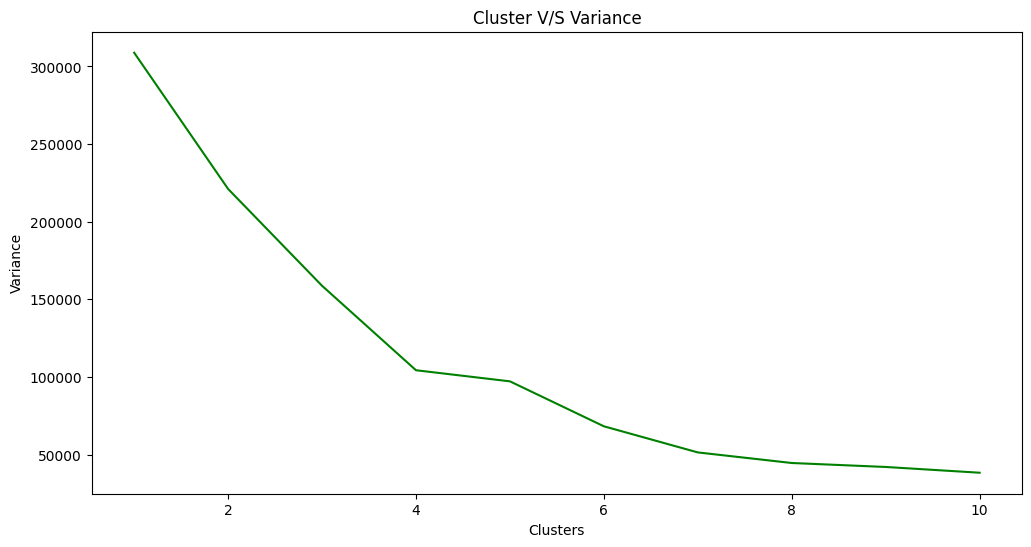

In [265]:
#To draw no.of cluster v/s variance
# clusters= [1,2,3,4,5,6,7,8,9,10] here we can use range(1,11) 
plt.figure(figsize=(12, 6))
plt.plot(range(1,11),wcss,color='g')
plt.xlabel("Clusters")
plt.ylabel("Variance")
plt.title('Cluster V/S Variance')

In [266]:
#here from 7 or 8 onwards the graph starts to be in a constant
#We choose 7 as the elbow point n_clusters=7


In [267]:
data1=KMeans(n_clusters=7,init='k-means++',random_state=42)
data1.fit(x)
y_pred=data1.predict(x)
y_pred

array([5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2,
       5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 0, 2, 5, 2,
       5, 2, 0, 6, 6, 6, 0, 6, 6, 0, 0, 0, 0, 0, 6, 0, 0, 6, 0, 0, 0, 6,
       0, 0, 6, 6, 0, 0, 0, 0, 0, 6, 0, 6, 6, 0, 0, 6, 0, 0, 6, 0, 0, 6,
       6, 0, 0, 6, 0, 6, 6, 6, 0, 6, 0, 6, 6, 0, 0, 6, 0, 6, 0, 0, 0, 0,
       0, 6, 6, 6, 6, 6, 0, 0, 0, 0, 6, 6, 6, 4, 6, 4, 6, 4, 3, 4, 3, 4,
       6, 4, 3, 4, 3, 4, 3, 4, 3, 4, 6, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1], dtype=int32)

In [268]:
#  Age	Annual Income (k$)	Spending Score (1-100)  y_pred
#  19	     15	                39                     5
#  21	     15	                81                     2

In [269]:
#To attach y_pred(output) into x(input)
x['Clusters']=y_pred
x

,Age,Annual Income (k$),Spending Score (1-100),Clusters
0,19,15,39,5
1,21,15,81,2
2,20,16,6,5
3,23,16,77,2
4,31,17,40,5
...,...,...,...,...
195,35,120,79,1
196,45,126,28,3
197,32,126,74,1
198,32,137,18,3


In [ ]:
x['Clusters'].value_counts()

Clusters
0    44
6    38
3    34
4    32
2    23
5    22
1     7
Name: count, dtype: int64

In [271]:
x1=x.iloc[:,:-1].values
x1

array([[ 19,  15,  39],
       [ 21,  15,  81],
       [ 20,  16,   6],
       [ 23,  16,  77],
       [ 31,  17,  40],
       [ 22,  17,  76],
       [ 35,  18,   6],
       [ 23,  18,  94],
       [ 64,  19,   3],
       [ 30,  19,  72],
       [ 67,  19,  14],
       [ 35,  19,  99],
       [ 58,  20,  15],
       [ 24,  20,  77],
       [ 37,  20,  13],
       [ 22,  20,  79],
       [ 35,  21,  35],
       [ 20,  21,  66],
       [ 52,  23,  29],
       [ 35,  23,  98],
       [ 35,  24,  35],
       [ 25,  24,  73],
       [ 46,  25,   5],
       [ 31,  25,  73],
       [ 54,  28,  14],
       [ 29,  28,  82],
       [ 45,  28,  32],
       [ 35,  28,  61],
       [ 40,  29,  31],
       [ 23,  29,  87],
       [ 60,  30,   4],
       [ 21,  30,  73],
       [ 53,  33,   4],
       [ 18,  33,  92],
       [ 49,  33,  14],
       [ 21,  33,  81],
       [ 42,  34,  17],
       [ 30,  34,  73],
       [ 36,  37,  26],
       [ 20,  37,  75],
       [ 65,  38,  35],
       [ 24,  38

In [272]:
y1= x.iloc[:,-1]
y1

0      5
1      2
2      5
3      2
4      5
      ..
195    1
196    3
197    1
198    3
199    1
Name: Clusters, Length: 200, dtype: int32

In [273]:
#testing and training data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.30,random_state=42)

In [274]:
x_train

array([[ 32,  87,  63],
       [ 27,  60,  50],
       [ 21,  30,  73],
       [ 58,  20,  15],
       [ 21,  33,  81],
       [ 50,  67,  57],
       [ 48,  39,  36],
       [ 36, 103,  85],
       [ 68,  59,  55],
       [ 44,  73,   7],
       [ 33,  42,  60],
       [ 40,  71,  95],
       [ 19,  81,   5],
       [ 24,  38,  92],
       [ 51,  67,  43],
       [ 19,  64,  46],
       [ 45,  28,  32],
       [ 35,  74,  72],
       [ 23,  62,  41],
       [ 19,  63,  54],
       [ 20,  16,   6],
       [ 40,  54,  48],
       [ 50,  40,  55],
       [ 28, 101,  68],
       [ 32, 103,  69],
       [ 48,  54,  46],
       [ 29,  79,  83],
       [ 42,  34,  17],
       [ 34, 103,  23],
       [ 19,  46,  55],
       [ 46,  25,   5],
       [ 32,  75,  93],
       [ 49,  62,  48],
       [ 18,  33,  92],
       [ 35,  19,  99],
       [ 47, 120,  16],
       [ 30,  78,  73],
       [ 35,  18,   6],
       [ 35,  28,  61],
       [ 27,  67,  56],
       [ 31,  17,  40],
       [ 53,  33

In [275]:
y_train

169    4
97     6
31     2
12     5
35     2
      ..
106    0
14     5
92     0
179    4
102    0
Name: Clusters, Length: 140, dtype: int32

In [276]:
#Normalisation
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()   
scaler.fit(x_train)
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)

In [ ]:
# MODEL CREATION
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
knn=KNeighborsClassifier(n_neighbors=7)
nav=GaussianNB()
sup=SVC()
dtc=DecisionTreeClassifier(criterion='entropy')
rf=RandomForestClassifier(random_state=0,n_estimators=200)
ab=AdaBoostClassifier(random_state=0)
gb=GradientBoostingClassifier(random_state=0)
xb=XGBClassifier(random_state=0)
lst=[knn,nav,sup,dtc,rf,ab,gb,xb]

In [278]:
for model in lst:
    print(model)
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    print(classification_report(y_test,y_pred))

KNeighborsClassifier(n_neighbors=7)
              precision    recall  f1-score   support

           0       0.93      1.00      0.97        14
           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         6
           3       1.00      1.00      1.00        12
           4       1.00      1.00      1.00         7
           5       1.00      1.00      1.00         5
           6       1.00      0.93      0.96        14

    accuracy                           0.98        60
   macro avg       0.99      0.99      0.99        60
weighted avg       0.98      0.98      0.98        60

GaussianNB()
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         6
           3       0.86      1.00      0.92        12
           4       1.00      1.00      1.00         7
           5       1.00      

c:\Users\Vandana Udayakumar\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Vandana Udayakumar\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Vandana Udayakumar\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         6
           3       0.80      1.00      0.89        12
           4       1.00      1.00      1.00         7
           5       1.00      1.00      1.00         5
           6       1.00      0.79      0.88        14

    accuracy                           0.95        60
   macro avg       0.97      0.97      0.97        60
weighted avg       0.96      0.95      0.95        60

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints